In [2]:
# in this version, the tresholding is automated.

%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd
import pims
from PIL import Image


import csv


#http://soft-matter.github.io/trackpy/v0.3.2/tutorial/walkthrough.html


from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
#mpl.rc('figure',  figsize=(10, 6))
#mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims

import scipy


import math



import scipy.ndimage

#own modules / functions
import sys
pythonPackagePath = "/Users/johannesschoeneberg/git/JohSchoeneberg/Confleezers/confleezers_data_analysis/"
sys.path.append(pythonPackagePath+"/modules")
import InputProcessing as inproc
import ForceFileProcessing as ffp
import TubeProcessing as tubeProc


#### plot definitions
#https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
#c_ch1 = 'aqua'
#c_ch1 = 'deepskyblue'
#c_ch1 = 'cyan'

#c_ch2 = 'springgreen'
#c_ch2 = 'lime'
#c_ch3 = 'red'
#lwidth = 3

#xlimit = (-150,300)

In [7]:
# read input parameters:
path = '/Volumes/Samsung_T3b/science/confleezers/2018-06-12/v3/'
maxEveryLineFolder = 'tube__maxIntAlongTube'

inputParameters = pd.read_csv(path+'_info.csv',names=['key','value'])
inputParameters[1:5]

outputDataFolder = inproc.getInputParameter(inputParameters,"output_data_folder")

In [4]:
df_vesicleCenters = pd.read_csv("vesicle_center_radius.csv")
df_vesicleCenters[0:10]

,Unnamed: 0,x[px],y[px],r[px]
0,0,78,166,27
1,1,78,166,27
2,2,78,166,27
3,3,78,166,27
4,4,78,166,27
5,5,78,166,27
6,6,78,166,27
7,7,78,166,27
8,8,78,166,27
9,9,78,166,27


# calculate the lumen intensity and the membrane intensity, ch0

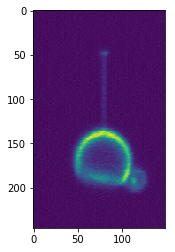

In [79]:
inputDataFolder = inproc.getInputParameter(inputParameters,"input_data_folder")
movie_zoomVesicle_ch0 = "movie_ch0_avg20_bleachCorrected.tif"

frames_ch0 = pims.TiffStack_pil(path+inputDataFolder+'/'+movie_zoomVesicle_ch0) 
plt.imshow(frames_ch0[0])

In [80]:
print(len(frames_ch0))

2357


30 30
166 78


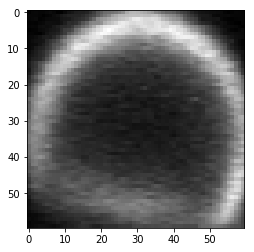

In [81]:
image = frames_ch0[50]


marginx = 30
marginy = 30

print(marginy,marginy)

midx = int(df_vesicleCenters.iloc[[50]]['y[px]'].values)
rangexTillEnd = len(image[0]) - midx
midy = int(df_vesicleCenters.iloc[[50]]['x[px]'].values)
print(midx,midy)
image_centeredOnVesicleAttachmentVector = image[midx-marginx:midx+marginx,midy-marginy:midy+marginy]

plt.imshow(image_centeredOnVesicleAttachmentVector,cmap='gray')
 
plt.show()

70
78 166


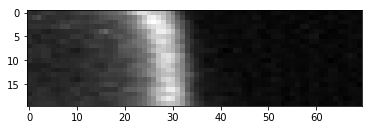

lumen range [0,14], membraneMaxIdx: 28, lumen intensity: 276.1214285714286, membrane intensity 924.7


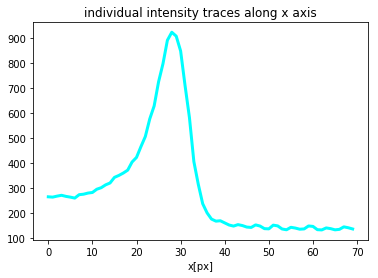

In [82]:
image = frames_ch0[50]



marginy = 10

midy = int(df_vesicleCenters.iloc[[50]]['y[px]'].values)
midx = int(df_vesicleCenters.iloc[[50]]['x[px]'].values)
rangexTillEnd = len(image[0]) - midx -1

print(rangexTillEnd)
print(midx,midy)
image_lumenAndMembrane_vesicleCenterToRight = image[midy-marginy:midy+marginy,midx:midx+rangexTillEnd]

plt.imshow(image_lumenAndMembrane_vesicleCenterToRight,cmap='gray')
plt.show()
    
lumenAndMembraneIntensity_lineAveraged = np.average(image_lumenAndMembrane_vesicleCenterToRight,axis=0)
plt.plot(lumenAndMembraneIntensity_lineAveraged,color='cyan',lw=3)    
plt.title('individual intensity traces along x axis')
plt.xlabel('x[px]');

membraneIntensity_ch0 = np.max(lumenAndMembraneIntensity_lineAveraged)
membraneMaxIdx_ch0 = np.argmax(lumenAndMembraneIntensity_lineAveraged)
lumenrange_ch0 = [0,int(0.5*membraneMaxIdx_ch0)]
lumenIntensity_ch0 = np.average(lumenAndMembraneIntensity_lineAveraged[lumenrange_ch0[0]:lumenrange_ch0[1]])

print("lumen range [{},{}], membraneMaxIdx: {}, lumen intensity: {}, membrane intensity {}".format(lumenrange_ch0[0],lumenrange_ch0[1], membraneMaxIdx_ch0,lumenIntensity_ch0,membraneIntensity_ch0))

# lumen intensity is the average from vesicle midpoint to halfway to the membrane
# the membrane is the max in that




# calculate the lumen intensity and the membrane intensity, ch1

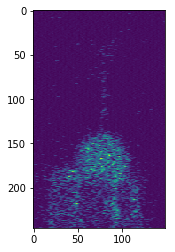

In [83]:
inputDataFolder = inproc.getInputParameter(inputParameters,"input_data_folder")
movie_zoomVesicle_ch1 = 'movie_ch1_avg20_bleachCorrected.tif'

frames_ch1 = pims.TiffStack_pil(path+inputDataFolder+movie_zoomVesicle_ch1) 
plt.imshow(frames_ch1[0])

70
78 166


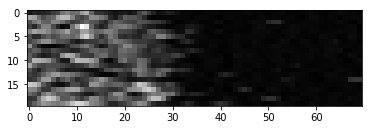

lumen intensity: 558.717857142857, membrane intensity 367.8


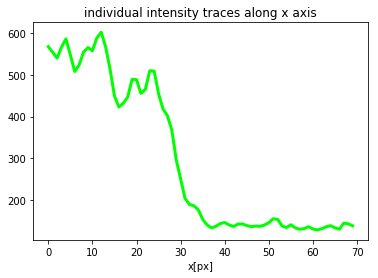

In [84]:
image = frames_ch1[50]



marginy = 10

midy = int(df_vesicleCenters.iloc[[50]]['y[px]'].values)
midx = int(df_vesicleCenters.iloc[[50]]['x[px]'].values)
rangexTillEnd = len(image[0]) - midx -1

print(rangexTillEnd)
print(midx,midy)
image_lumenAndMembrane_vesicleCenterToRight = image[midy-marginy:midy+marginy,midx:midx+rangexTillEnd]

plt.imshow(image_lumenAndMembrane_vesicleCenterToRight,cmap='gray')
plt.show()
    
lumenAndMembraneIntensity_lineAveraged = np.average(image_lumenAndMembrane_vesicleCenterToRight,axis=0)
plt.plot(lumenAndMembraneIntensity_lineAveraged,color='lime',lw=3)    
plt.title('individual intensity traces along x axis')
plt.xlabel('x[px]');

membraneIntensity_ch1 = lumenAndMembraneIntensity_lineAveraged[membraneMaxIdx_ch0]
lumenIntensity_ch1 = np.average(lumenAndMembraneIntensity_lineAveraged[lumenrange_ch0[0]:lumenrange_ch0[1]])

print("lumen intensity: {}, membrane intensity {}".format(lumenIntensity_ch1,membraneIntensity_ch1))

# lumen intensity is the average from vesicle midpoint to halfway to the membrane
# the membrane is the max in that





# calculate the lumen intensity and the membrane intensity, ch2

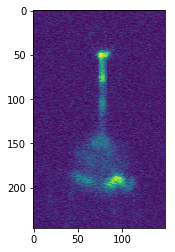

In [85]:
inputDataFolder = inproc.getInputParameter(inputParameters,"input_data_folder")
movie_zoomVesicle_ch2 = "movie_ch2_avg20_bleachCorrected.tif"

frames_ch2 = pims.TiffStack_pil(path+inputDataFolder+movie_zoomVesicle_ch2) 
plt.imshow(frames_ch2[0])

70
78 166


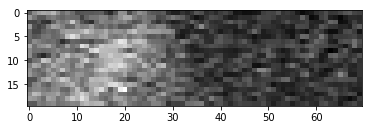

lumen intensity: 865.5678571428572, membrane intensity 742.9


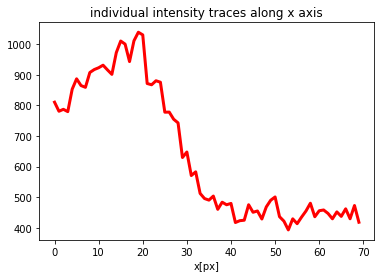

In [86]:
image = frames_ch2[50]



marginy = 10

midy = int(df_vesicleCenters.iloc[[50]]['y[px]'].values)
midx = int(df_vesicleCenters.iloc[[50]]['x[px]'].values)
rangexTillEnd = len(image[0]) - midx -1

print(rangexTillEnd)
print(midx,midy)
image_lumenAndMembrane_vesicleCenterToRight = image[midy-marginy:midy+marginy,midx:midx+rangexTillEnd]

plt.imshow(image_lumenAndMembrane_vesicleCenterToRight,cmap='gray')
plt.show()
    
lumenAndMembraneIntensity_lineAveraged = np.average(image_lumenAndMembrane_vesicleCenterToRight,axis=0)
plt.plot(lumenAndMembraneIntensity_lineAveraged,color='red',lw=3)    
plt.title('individual intensity traces along x axis')
plt.xlabel('x[px]');

membraneIntensity_ch2 = lumenAndMembraneIntensity_lineAveraged[membraneMaxIdx_ch0]
lumenIntensity_ch2 = np.average(lumenAndMembraneIntensity_lineAveraged[lumenrange_ch0[0]:lumenrange_ch0[1]])

print("lumen intensity: {}, membrane intensity {}".format(lumenIntensity_ch2,membraneIntensity_ch2))

# lumen intensity is the average from vesicle midpoint to halfway to the membrane
# the membrane is the max in that






# calculate for the whole movie

In [87]:
len(frames_ch0)

2357

In [88]:
len(df_vesicleCenters)

2357

In [89]:
verbose = False
writeOutput = True

marginy = 10

result = []

for frameId in range(0,len(frames_ch0)):
#for frameId in range(0,5):
    if(frameId %10 ==0):
        print(frameId)
        

    # get the reference points from ch0
    image = frames_ch0[frameId]
    
        
    midy = int(df_vesicleCenters.iloc[[frameId]]['y[px]'].values)
    midx = int(df_vesicleCenters.iloc[[frameId]]['x[px]'].values)
    rangexTillEnd = len(image[0]) - midx -1
    image_lumenAndMembrane_vesicleCenterToRight = image[midy-marginy:midy+marginy,midx:midx+rangexTillEnd]
    lumenAndMembraneIntensity_lineAveraged = np.average(image_lumenAndMembrane_vesicleCenterToRight,axis=0)
    
    
    if(verbose):
        print(rangexTillEnd)
        print(midx,midy)
        plt.imshow(image_lumenAndMembrane_vesicleCenterToRight,cmap='gray')
        plt.show()

        plt.plot(lumenAndMembraneIntensity_lineAveraged,color='cyan',lw=3)    
        plt.title('individual intensity traces along x axis')
        plt.xlabel('x[px]');
        plt.show()
    
    membraneIntensity_ch0 = np.round(np.max(lumenAndMembraneIntensity_lineAveraged),decimals=2)
    membraneMaxIdx_ch0 = np.argmax(lumenAndMembraneIntensity_lineAveraged)
    lumenrange_ch0 = [0,int(0.5*membraneMaxIdx_ch0)]
    lumenIntensity_ch0 = np.round(np.average(lumenAndMembraneIntensity_lineAveraged[lumenrange_ch0[0]:lumenrange_ch0[1]]),decimals=2)
    
    print("Ch0: lumen intensity: {}, membrane intensity {}, lumen range [{},{}], membraneMaxIdx: {},".format(lumenIntensity_ch0,membraneIntensity_ch0,lumenrange_ch0[0],lumenrange_ch0[1], membraneMaxIdx_ch0,))
    
    
    # lumen intensity is the average from vesicle midpoint to halfway to the membrane
    # the membrane is the max in that


#CH1

    image = frames_ch1[frameId]
    
    
    image_lumenAndMembrane_vesicleCenterToRight = image[midy-marginy:midy+marginy,midx:midx+rangexTillEnd]
    lumenAndMembraneIntensity_lineAveraged = np.average(image_lumenAndMembrane_vesicleCenterToRight,axis=0)
    
    if(verbose):
        plt.imshow(image_lumenAndMembrane_vesicleCenterToRight,cmap='gray')
        plt.show()
        plt.plot(lumenAndMembraneIntensity_lineAveraged,color='lime',lw=3)    
        plt.title('individual intensity traces along x axis')
        plt.xlabel('x[px]');
        plt.show()
    
    membraneIntensity_ch1 = np.round(lumenAndMembraneIntensity_lineAveraged[membraneMaxIdx_ch0],decimals=2)
    lumenIntensity_ch1 = np.round(np.average(lumenAndMembraneIntensity_lineAveraged[lumenrange_ch0[0]:lumenrange_ch0[1]]),decimals=2)
    
    print("Ch1: lumen intensity: {}, membrane intensity {}".format(lumenIntensity_ch1,membraneIntensity_ch1))
    
    # lumen intensity is the average from vesicle midpoint to halfway to the membrane
    # the membrane is the max in that


#CH2

    image = frames_ch2[frameId]
    
    image_lumenAndMembrane_vesicleCenterToRight = image[midy-marginy:midy+marginy,midx:midx+rangexTillEnd]


    
    lumenAndMembraneIntensity_lineAveraged = np.average(image_lumenAndMembrane_vesicleCenterToRight,axis=0)
    if(verbose):
        plt.imshow(image_lumenAndMembrane_vesicleCenterToRight,cmap='gray')
        plt.show()
        plt.plot(lumenAndMembraneIntensity_lineAveraged,color='red',lw=3)    
        plt.title('individual intensity traces along x axis')
        plt.xlabel('x[px]');
        plt.show()
    
    membraneIntensity_ch2 = np.round(lumenAndMembraneIntensity_lineAveraged[membraneMaxIdx_ch0],decimals=2)
    lumenIntensity_ch2 = np.round(np.average(lumenAndMembraneIntensity_lineAveraged[lumenrange_ch0[0]:lumenrange_ch0[1]]),decimals=2)
    
    print("CH2: lumen intensity: {}, membrane intensity {}".format(lumenIntensity_ch2,membraneIntensity_ch2))
    
# lumen intensity is the average from vesicle midpoint to halfway to the membrane
# the membrane is the max in that


    result.append(np.array([membraneIntensity_ch0,lumenIntensity_ch0,membraneIntensity_ch1,lumenIntensity_ch1,membraneIntensity_ch2,lumenIntensity_ch2]))

if(writeOutput):
    df = pd.DataFrame(np.array(result))
    df.to_csv(outputfolder+"/vesicle_lumen_membrane_intensity.csv",
              header=['membraneIntensity_ch0','lumenIntensity_ch0','membraneIntensity_ch1','lumenIntensity_ch1','membraneIntensity_ch2','lumenIntensity_ch2'])





0
Ch0: lumen intensity: 269.86, membrane intensity 974.25, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 574.28, membrane intensity 311.4
CH2: lumen intensity: 1045.41, membrane intensity 592.15
Ch0: lumen intensity: 270.22, membrane intensity 982.75, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 581.55, membrane intensity 303.7
CH2: lumen intensity: 1047.87, membrane intensity 591.1
Ch0: lumen intensity: 270.81, membrane intensity 978.0, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 584.88, membrane intensity 276.65
CH2: lumen intensity: 1042.25, membrane intensity 600.45
Ch0: lumen intensity: 271.05, membrane intensity 977.1, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 594.19, membrane intensity 279.15
CH2: lumen intensity: 1032.96, membrane intensity 604.5
Ch0: lumen intensity: 270.31, membrane intensity 972.05, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 582.65, membrane intensity 268.5
CH2: lumen i

Ch1: lumen intensity: 560.9, membrane intensity 336.15
CH2: lumen intensity: 968.04, membrane intensity 792.25
Ch0: lumen intensity: 276.45, membrane intensity 944.85, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 564.43, membrane intensity 312.75
CH2: lumen intensity: 1003.74, membrane intensity 778.75
Ch0: lumen intensity: 276.22, membrane intensity 937.3, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 570.24, membrane intensity 302.3
CH2: lumen intensity: 1012.14, membrane intensity 777.3
Ch0: lumen intensity: 275.92, membrane intensity 932.15, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 564.79, membrane intensity 307.45
CH2: lumen intensity: 1011.33, membrane intensity 713.4
Ch0: lumen intensity: 275.38, membrane intensity 932.15, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 559.27, membrane intensity 308.8
CH2: lumen intensity: 977.36, membrane intensity 716.95
Ch0: lumen intensity: 276.13, membrane intensity 927.55

Ch0: lumen intensity: 290.59, membrane intensity 891.05, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 522.2, membrane intensity 279.0
CH2: lumen intensity: 1001.28, membrane intensity 534.0
Ch0: lumen intensity: 290.56, membrane intensity 885.15, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 530.64, membrane intensity 280.5
CH2: lumen intensity: 1003.35, membrane intensity 529.15
Ch0: lumen intensity: 290.37, membrane intensity 889.05, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 537.95, membrane intensity 281.95
CH2: lumen intensity: 1003.66, membrane intensity 523.8
Ch0: lumen intensity: 290.83, membrane intensity 880.8, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 534.43, membrane intensity 297.45
CH2: lumen intensity: 998.51, membrane intensity 522.25
Ch0: lumen intensity: 291.58, membrane intensity 876.55, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 526.72, membrane intensity 297.2
CH2: lumen inte

CH2: lumen intensity: 824.89, membrane intensity 560.0
Ch0: lumen intensity: 291.91, membrane intensity 869.85, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 557.85, membrane intensity 244.35
CH2: lumen intensity: 829.16, membrane intensity 569.6
Ch0: lumen intensity: 291.17, membrane intensity 867.7, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 562.87, membrane intensity 245.8
CH2: lumen intensity: 824.29, membrane intensity 580.75
Ch0: lumen intensity: 290.82, membrane intensity 863.55, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 562.95, membrane intensity 240.2
CH2: lumen intensity: 833.22, membrane intensity 589.55
Ch0: lumen intensity: 288.23, membrane intensity 863.05, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 565.42, membrane intensity 293.35
CH2: lumen intensity: 837.56, membrane intensity 558.6
Ch0: lumen intensity: 287.62, membrane intensity 866.8, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensi

CH2: lumen intensity: 902.94, membrane intensity 708.2
Ch0: lumen intensity: 302.02, membrane intensity 842.55, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 486.87, membrane intensity 272.75
CH2: lumen intensity: 903.13, membrane intensity 617.8
Ch0: lumen intensity: 302.02, membrane intensity 842.8, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 483.34, membrane intensity 278.0
CH2: lumen intensity: 900.23, membrane intensity 589.1
Ch0: lumen intensity: 301.44, membrane intensity 833.5, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 477.25, membrane intensity 273.75
CH2: lumen intensity: 861.47, membrane intensity 590.6
Ch0: lumen intensity: 301.28, membrane intensity 831.5, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 477.99, membrane intensity 267.2
CH2: lumen intensity: 851.0, membrane intensity 584.75
Ch0: lumen intensity: 300.82, membrane intensity 829.35, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity:

CH2: lumen intensity: 841.16, membrane intensity 593.2
Ch0: lumen intensity: 303.74, membrane intensity 823.5, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 505.47, membrane intensity 303.3
CH2: lumen intensity: 836.7, membrane intensity 560.25
Ch0: lumen intensity: 303.98, membrane intensity 821.3, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 507.88, membrane intensity 290.9
CH2: lumen intensity: 835.89, membrane intensity 534.7
Ch0: lumen intensity: 304.23, membrane intensity 814.0, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 515.56, membrane intensity 281.85
CH2: lumen intensity: 788.22, membrane intensity 530.55
Ch0: lumen intensity: 302.94, membrane intensity 813.3, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 504.44, membrane intensity 276.7
CH2: lumen intensity: 797.17, membrane intensity 535.4
Ch0: lumen intensity: 300.57, membrane intensity 826.0, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 5

Ch1: lumen intensity: 516.69, membrane intensity 274.95
CH2: lumen intensity: 805.72, membrane intensity 639.3
Ch0: lumen intensity: 309.75, membrane intensity 775.35, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 520.83, membrane intensity 266.85
CH2: lumen intensity: 802.91, membrane intensity 614.75
Ch0: lumen intensity: 309.51, membrane intensity 772.45, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 528.25, membrane intensity 265.9
CH2: lumen intensity: 794.26, membrane intensity 604.8
Ch0: lumen intensity: 310.08, membrane intensity 778.15, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 520.39, membrane intensity 270.9
CH2: lumen intensity: 794.16, membrane intensity 606.05
Ch0: lumen intensity: 309.61, membrane intensity 777.85, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 532.1, membrane intensity 270.6
CH2: lumen intensity: 789.89, membrane intensity 605.65
Ch0: lumen intensity: 309.72, membrane intensity 780.9, lu

/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
270
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: 317.3, membrane intensity 759.95, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 497.66, membrane intensity 305.65
CH2: lumen intensity: 802.11, membrane intensity 692.45
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, memb

Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: 

Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: 302.7, membrane intensity 764.25, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 510.84, membrane intensity 289.15
CH2: lumen intensity: 969.26, membrane intensity 630.6
360
Ch0: lumen intensity: 301.1, memb

Ch0: lumen intensity: 279.45, membrane intensity 831.4, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 554.09, membrane intensity 221.35
CH2: lumen intensity: 888.76, membrane intensity 708.2
Ch0: lumen intensity: 279.74, membrane intensity 835.4, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 557.19, membrane intensity 245.8
CH2: lumen intensity: 875.82, membrane intensity 698.7
Ch0: lumen intensity: 282.27, membrane intensity 831.6, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 562.17, membrane intensity 250.65
CH2: lumen intensity: 872.26, membrane intensity 689.3
400
Ch0: lumen intensity: 284.45, membrane intensity 827.8, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 563.11, membrane intensity 251.5
CH2: lumen intensity: 875.46, membrane intensity 692.35
Ch0: lumen intensity: 284.32, membrane intensity 827.5, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 570.47, membrane intensity 255.95
CH2: lumen intens

Ch0: lumen intensity: 294.67, membrane intensity 801.4, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 521.21, membrane intensity 320.95
CH2: lumen intensity: 954.38, membrane intensity 608.5
Ch0: lumen intensity: 291.64, membrane intensity 806.65, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 517.28, membrane intensity 315.3
CH2: lumen intensity: 943.77, membrane intensity 589.05
440
Ch0: lumen intensity: 292.02, membrane intensity 806.7, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 519.39, membrane intensity 306.05
CH2: lumen intensity: 946.01, membrane intensity 590.85
Ch0: lumen intensity: 292.94, membrane intensity 800.75, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 505.52, membrane intensity 319.85
CH2: lumen intensity: 964.9, membrane intensity 590.45
Ch0: lumen intensity: 292.48, membrane intensity 802.55, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 501.48, membrane intensity 310.9
CH2: lumen in

Ch1: lumen intensity: 487.94, membrane intensity 268.0
CH2: lumen intensity: 758.84, membrane intensity 678.95
Ch0: lumen intensity: 290.57, membrane intensity 780.7, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 504.12, membrane intensity 283.9
CH2: lumen intensity: 754.73, membrane intensity 544.4
480
Ch0: lumen intensity: 289.61, membrane intensity 784.05, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 488.48, membrane intensity 305.9
CH2: lumen intensity: 757.37, membrane intensity 527.3
Ch0: lumen intensity: 289.51, membrane intensity 778.0, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 501.83, membrane intensity 302.6
CH2: lumen intensity: 745.45, membrane intensity 500.2
Ch0: lumen intensity: 289.33, membrane intensity 776.6, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 493.78, membrane intensity 305.8
CH2: lumen intensity: 736.98, membrane intensity 499.7
Ch0: lumen intensity: 289.73, membrane intensity 779.35, lum

CH2: lumen intensity: 943.96, membrane intensity 480.2
Ch0: lumen intensity: 283.22, membrane intensity 796.65, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 549.79, membrane intensity 255.15
CH2: lumen intensity: 957.83, membrane intensity 483.4
520
Ch0: lumen intensity: 283.89, membrane intensity 793.75, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 546.68, membrane intensity 250.9
CH2: lumen intensity: 1032.54, membrane intensity 475.95
Ch0: lumen intensity: 286.0, membrane intensity 793.1, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 552.64, membrane intensity 270.45
CH2: lumen intensity: 1042.5, membrane intensity 463.5
Ch0: lumen intensity: 286.06, membrane intensity 793.5, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 544.63, membrane intensity 285.5
CH2: lumen intensity: 1040.53, membrane intensity 449.85
Ch0: lumen intensity: 287.02, membrane intensity 796.5, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen int

Ch1: lumen intensity: 530.94, membrane intensity 273.2
CH2: lumen intensity: 845.93, membrane intensity 496.1
560
Ch0: lumen intensity: 283.1, membrane intensity 760.5, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 533.98, membrane intensity 299.3
CH2: lumen intensity: 821.44, membrane intensity 480.8
Ch0: lumen intensity: 283.83, membrane intensity 764.05, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 531.8, membrane intensity 287.95
CH2: lumen intensity: 829.13, membrane intensity 466.2
Ch0: lumen intensity: 282.99, membrane intensity 758.85, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 526.78, membrane intensity 288.1
CH2: lumen intensity: 887.58, membrane intensity 460.9
Ch0: lumen intensity: 279.7, membrane intensity 755.75, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 523.8, membrane intensity 306.85
CH2: lumen intensity: 903.99, membrane intensity 482.7
Ch0: lumen intensity: 280.81, membrane intensity 756.45, lume

Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: 

Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
650
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
C

CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: 290.6, membrane intensity 728.55, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 518.07, membrane intensity 226.55
CH2: lumen intensity: 1261.54, membrane in

CH2: lumen intensity: 830.54, membrane intensity 740.1
Ch0: lumen intensity: 232.79, membrane intensity 977.55, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 557.96, membrane intensity 311.35
CH2: lumen intensity: 827.5, membrane intensity 728.55
Ch0: lumen intensity: 231.45, membrane intensity 976.55, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 567.08, membrane intensity 311.7
CH2: lumen intensity: 834.95, membrane intensity 723.05
Ch0: lumen intensity: 231.19, membrane intensity 976.6, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 563.1, membrane intensity 308.3
CH2: lumen intensity: 841.36, membrane intensity 740.7
Ch0: lumen intensity: 231.54, membrane intensity 977.3, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 566.17, membrane intensity 313.2
CH2: lumen intensity: 840.49, membrane intensity 737.05
Ch0: lumen intensity: 232.93, membrane intensity 974.85, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity

CH2: lumen intensity: 807.03, membrane intensity 837.35
Ch0: lumen intensity: 234.33, membrane intensity 927.9, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 515.79, membrane intensity 309.5
CH2: lumen intensity: 811.9, membrane intensity 842.3
Ch0: lumen intensity: 233.95, membrane intensity 925.0, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 503.52, membrane intensity 309.7
CH2: lumen intensity: 821.31, membrane intensity 801.75
Ch0: lumen intensity: 234.28, membrane intensity 926.85, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 509.11, membrane intensity 292.55
CH2: lumen intensity: 826.86, membrane intensity 758.3
Ch0: lumen intensity: 234.24, membrane intensity 921.6, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 503.71, membrane intensity 296.25
CH2: lumen intensity: 798.01, membrane intensity 746.15
Ch0: lumen intensity: 234.68, membrane intensity 917.4, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity

Ch0: lumen intensity: 242.61, membrane intensity 894.4, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 523.6, membrane intensity 312.55
CH2: lumen intensity: 781.58, membrane intensity 526.6
Ch0: lumen intensity: 242.69, membrane intensity 890.0, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 517.99, membrane intensity 320.9
CH2: lumen intensity: 780.56, membrane intensity 525.85
Ch0: lumen intensity: 242.61, membrane intensity 885.4, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 510.37, membrane intensity 299.35
CH2: lumen intensity: 776.81, membrane intensity 528.1
Ch0: lumen intensity: 241.04, membrane intensity 885.95, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 510.25, membrane intensity 300.35
CH2: lumen intensity: 774.62, membrane intensity 534.2
Ch0: lumen intensity: 241.16, membrane intensity 889.7, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 519.53, membrane intensity 295.95
CH2: lumen intensity

CH2: lumen intensity: 773.39, membrane intensity 582.45
Ch0: lumen intensity: 243.75, membrane intensity 877.75, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 526.12, membrane intensity 342.8
CH2: lumen intensity: 780.8, membrane intensity 601.4
Ch0: lumen intensity: 244.64, membrane intensity 880.65, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 529.49, membrane intensity 333.25
CH2: lumen intensity: 774.94, membrane intensity 604.55
Ch0: lumen intensity: 244.74, membrane intensity 878.7, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 542.76, membrane intensity 339.0
CH2: lumen intensity: 764.94, membrane intensity 597.2
Ch0: lumen intensity: 243.84, membrane intensity 882.45, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 545.21, membrane intensity 354.0
CH2: lumen intensity: 770.97, membrane intensity 590.35
Ch0: lumen intensity: 245.31, membrane intensity 878.4, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensit

Ch1: lumen intensity: 534.01, membrane intensity 290.7
CH2: lumen intensity: 818.67, membrane intensity 788.95
Ch0: lumen intensity: 242.41, membrane intensity 879.9, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 532.97, membrane intensity 284.3
CH2: lumen intensity: 815.28, membrane intensity 777.2
Ch0: lumen intensity: 244.1, membrane intensity 872.85, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 525.22, membrane intensity 288.7
CH2: lumen intensity: 796.65, membrane intensity 734.55
Ch0: lumen intensity: 244.01, membrane intensity 873.05, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 527.68, membrane intensity 290.2
CH2: lumen intensity: 792.27, membrane intensity 721.85
Ch0: lumen intensity: 244.11, membrane intensity 872.7, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 516.31, membrane intensity 282.7
CH2: lumen intensity: 791.81, membrane intensity 622.85
Ch0: lumen intensity: 245.04, membrane intensity 867.6, lumen

Ch0: lumen intensity: 219.72, membrane intensity 947.75, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 573.21, membrane intensity 349.1
CH2: lumen intensity: 774.82, membrane intensity 781.5
Ch0: lumen intensity: 219.89, membrane intensity 949.45, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 571.44, membrane intensity 331.45
CH2: lumen intensity: 781.03, membrane intensity 771.4
Ch0: lumen intensity: 219.79, membrane intensity 946.5, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 578.27, membrane intensity 320.7
CH2: lumen intensity: 781.99, membrane intensity 762.45
Ch0: lumen intensity: 219.64, membrane intensity 958.4, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 577.1, membrane intensity 335.55
CH2: lumen intensity: 780.99, membrane intensity 755.7
Ch0: lumen intensity: 219.55, membrane intensity 956.25, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 580.29, membrane intensity 308.85
CH2: lumen intensit

Ch1: lumen intensity: 500.55, membrane intensity 313.95
CH2: lumen intensity: 734.12, membrane intensity 563.9
Ch0: lumen intensity: 218.29, membrane intensity 950.45, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 495.3, membrane intensity 319.75
CH2: lumen intensity: 729.05, membrane intensity 681.75
Ch0: lumen intensity: 218.18, membrane intensity 949.5, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 502.84, membrane intensity 343.6
CH2: lumen intensity: 731.88, membrane intensity 762.15
Ch0: lumen intensity: 218.62, membrane intensity 941.35, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 512.17, membrane intensity 347.05
CH2: lumen intensity: 728.84, membrane intensity 779.3
1020
Ch0: lumen intensity: 219.04, membrane intensity 941.9, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 515.75, membrane intensity 345.55
CH2: lumen intensity: 725.02, membrane intensity 758.6
Ch0: lumen intensity: 219.5, membrane intensity 942.85

Ch0: lumen intensity: 220.54, membrane intensity 930.25, lumen range [0,15], membraneMaxIdx: 30,
Ch1: lumen intensity: 548.83, membrane intensity 310.45
CH2: lumen intensity: 856.54, membrane intensity 612.95
Ch0: lumen intensity: 220.98, membrane intensity 931.95, lumen range [0,15], membraneMaxIdx: 30,
Ch1: lumen intensity: 555.68, membrane intensity 324.55
CH2: lumen intensity: 888.78, membrane intensity 617.8
Ch0: lumen intensity: 220.62, membrane intensity 931.35, lumen range [0,15], membraneMaxIdx: 30,
Ch1: lumen intensity: 547.67, membrane intensity 307.85
CH2: lumen intensity: 888.84, membrane intensity 611.7
Ch0: lumen intensity: 220.69, membrane intensity 934.9, lumen range [0,15], membraneMaxIdx: 30,
Ch1: lumen intensity: 539.94, membrane intensity 310.95
CH2: lumen intensity: 883.71, membrane intensity 634.85
1060
Ch0: lumen intensity: 220.7, membrane intensity 936.55, lumen range [0,15], membraneMaxIdx: 30,
Ch1: lumen intensity: 531.6, membrane intensity 326.75
CH2: lumen 

Ch1: lumen intensity: 534.22, membrane intensity 275.15
CH2: lumen intensity: 780.58, membrane intensity 527.65
Ch0: lumen intensity: 224.07, membrane intensity 911.55, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 536.41, membrane intensity 283.7
CH2: lumen intensity: 765.81, membrane intensity 529.15
Ch0: lumen intensity: 223.4, membrane intensity 913.3, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 542.93, membrane intensity 277.75
CH2: lumen intensity: 775.67, membrane intensity 534.8
Ch0: lumen intensity: 223.09, membrane intensity 909.95, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 553.35, membrane intensity 278.1
CH2: lumen intensity: 771.06, membrane intensity 507.65
1100
Ch0: lumen intensity: 222.74, membrane intensity 915.5, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 558.12, membrane intensity 271.25
CH2: lumen intensity: 762.24, membrane intensity 503.75
Ch0: lumen intensity: 223.17, membrane intensity 915.

Ch0: lumen intensity: 221.71, membrane intensity 904.85, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 552.15, membrane intensity 348.15
CH2: lumen intensity: 754.76, membrane intensity 723.3
Ch0: lumen intensity: 221.79, membrane intensity 900.6, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 553.89, membrane intensity 346.8
CH2: lumen intensity: 749.92, membrane intensity 717.9
Ch0: lumen intensity: 222.07, membrane intensity 894.7, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 560.23, membrane intensity 342.2
CH2: lumen intensity: 751.49, membrane intensity 709.7
Ch0: lumen intensity: 224.01, membrane intensity 892.3, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 546.3, membrane intensity 350.3
CH2: lumen intensity: 754.45, membrane intensity 663.65
1180
Ch0: lumen intensity: 223.37, membrane intensity 896.35, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 551.11, membrane intensity 344.7
CH2: lumen intens

CH2: lumen intensity: 737.92, membrane intensity 709.95
Ch0: lumen intensity: 222.48, membrane intensity 930.35, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 508.67, membrane intensity 346.8
CH2: lumen intensity: 736.7, membrane intensity 711.05
Ch0: lumen intensity: 223.05, membrane intensity 934.65, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 517.33, membrane intensity 331.7
CH2: lumen intensity: 734.0, membrane intensity 698.8
1220
Ch0: lumen intensity: 223.59, membrane intensity 934.75, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 527.97, membrane intensity 313.55
CH2: lumen intensity: 737.58, membrane intensity 646.9
Ch0: lumen intensity: 224.07, membrane intensity 932.6, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 528.49, membrane intensity 305.9
CH2: lumen intensity: 737.56, membrane intensity 659.15
Ch0: lumen intensity: 223.72, membrane intensity 927.9, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen inte

CH2: lumen intensity: 718.04, membrane intensity 551.3
Ch0: lumen intensity: 226.88, membrane intensity 888.9, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 515.11, membrane intensity 250.5
CH2: lumen intensity: 717.6, membrane intensity 544.7
Ch0: lumen intensity: 226.6, membrane intensity 884.25, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 519.78, membrane intensity 253.8
CH2: lumen intensity: 711.34, membrane intensity 539.8
1260
Ch0: lumen intensity: 226.07, membrane intensity 877.7, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 511.09, membrane intensity 268.9
CH2: lumen intensity: 715.61, membrane intensity 536.05
Ch0: lumen intensity: 226.14, membrane intensity 877.7, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 509.11, membrane intensity 275.9
CH2: lumen intensity: 721.05, membrane intensity 543.0
Ch0: lumen intensity: 226.49, membrane intensity 882.0, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity

CH2: lumen intensity: 935.96, membrane intensity 540.15
Ch0: lumen intensity: 227.03, membrane intensity 879.4, lumen range [0,15], membraneMaxIdx: 30,
Ch1: lumen intensity: 541.87, membrane intensity 285.05
CH2: lumen intensity: 937.72, membrane intensity 537.45
Ch0: lumen intensity: 227.43, membrane intensity 880.3, lumen range [0,15], membraneMaxIdx: 30,
Ch1: lumen intensity: 539.25, membrane intensity 301.0
CH2: lumen intensity: 938.97, membrane intensity 530.25
1300
Ch0: lumen intensity: 227.87, membrane intensity 874.85, lumen range [0,15], membraneMaxIdx: 30,
Ch1: lumen intensity: 537.65, membrane intensity 306.7
CH2: lumen intensity: 941.95, membrane intensity 511.6
Ch0: lumen intensity: 227.95, membrane intensity 882.0, lumen range [0,15], membraneMaxIdx: 30,
Ch1: lumen intensity: 530.28, membrane intensity 291.25
CH2: lumen intensity: 936.75, membrane intensity 524.9
Ch0: lumen intensity: 231.07, membrane intensity 861.35, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen in

Ch1: lumen intensity: 522.01, membrane intensity 296.8
CH2: lumen intensity: 751.97, membrane intensity 587.7
Ch0: lumen intensity: 228.97, membrane intensity 860.1, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 519.0, membrane intensity 289.8
CH2: lumen intensity: 752.08, membrane intensity 583.95
1340
Ch0: lumen intensity: 228.67, membrane intensity 855.0, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 525.25, membrane intensity 288.45
CH2: lumen intensity: 734.69, membrane intensity 627.95
Ch0: lumen intensity: 229.81, membrane intensity 852.5, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 521.6, membrane intensity 283.9
CH2: lumen intensity: 730.04, membrane intensity 696.85
Ch0: lumen intensity: 229.87, membrane intensity 845.15, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 522.9, membrane intensity 284.6
CH2: lumen intensity: 788.76, membrane intensity 696.2
Ch0: lumen intensity: 230.72, membrane intensity 836.3, lum

Ch0: lumen intensity: 231.44, membrane intensity 872.1, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 556.15, membrane intensity 277.2
CH2: lumen intensity: 797.25, membrane intensity 583.1
Ch0: lumen intensity: 232.01, membrane intensity 867.75, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 562.56, membrane intensity 287.85
CH2: lumen intensity: 793.45, membrane intensity 578.8
1380
Ch0: lumen intensity: 230.85, membrane intensity 859.85, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 557.49, membrane intensity 297.45
CH2: lumen intensity: 790.89, membrane intensity 579.8
Ch0: lumen intensity: 231.28, membrane intensity 859.25, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 547.57, membrane intensity 288.65
CH2: lumen intensity: 739.0, membrane intensity 590.2
Ch0: lumen intensity: 231.05, membrane intensity 857.45, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 543.94, membrane intensity 302.65
CH2: lumen in

Ch1: lumen intensity: 517.95, membrane intensity 319.85
CH2: lumen intensity: 687.92, membrane intensity 571.75
1420
Ch0: lumen intensity: 233.16, membrane intensity 858.7, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 522.94, membrane intensity 327.85
CH2: lumen intensity: 687.05, membrane intensity 573.3
Ch0: lumen intensity: 235.51, membrane intensity 849.7, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 521.52, membrane intensity 338.75
CH2: lumen intensity: 672.4, membrane intensity 570.6
Ch0: lumen intensity: 233.89, membrane intensity 858.3, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 518.48, membrane intensity 361.3
CH2: lumen intensity: 686.74, membrane intensity 581.05
Ch0: lumen intensity: 235.49, membrane intensity 844.45, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 511.78, membrane intensity 341.15
CH2: lumen intensity: 677.58, membrane intensity 634.6
Ch0: lumen intensity: 235.88, membrane intensity 841.5,

Ch0: lumen intensity: 234.58, membrane intensity 834.5, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 463.84, membrane intensity 259.6
CH2: lumen intensity: 748.77, membrane intensity 577.25
1460
Ch0: lumen intensity: 235.14, membrane intensity 832.1, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 465.71, membrane intensity 257.7
CH2: lumen intensity: 748.5, membrane intensity 570.9
Ch0: lumen intensity: 236.05, membrane intensity 823.05, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 477.16, membrane intensity 241.75
CH2: lumen intensity: 750.83, membrane intensity 508.95
Ch0: lumen intensity: 234.42, membrane intensity 837.6, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 468.32, membrane intensity 250.45
CH2: lumen intensity: 755.23, membrane intensity 532.05
Ch0: lumen intensity: 235.78, membrane intensity 823.75, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 476.41, membrane intensity 258.4
CH2: lumen int

Ch0: lumen intensity: 232.05, membrane intensity 826.35, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 474.38, membrane intensity 302.95
CH2: lumen intensity: 733.71, membrane intensity 684.1
Ch0: lumen intensity: 232.45, membrane intensity 823.55, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 470.8, membrane intensity 313.55
CH2: lumen intensity: 725.24, membrane intensity 684.3
Ch0: lumen intensity: 232.49, membrane intensity 824.25, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 474.36, membrane intensity 313.5
CH2: lumen intensity: 716.69, membrane intensity 676.2
Ch0: lumen intensity: 234.13, membrane intensity 830.15, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 483.39, membrane intensity 321.35
CH2: lumen intensity: 712.21, membrane intensity 605.4
Ch0: lumen intensity: 233.62, membrane intensity 829.9, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 477.16, membrane intensity 306.5
CH2: lumen intensit

CH2: lumen intensity: 783.76, membrane intensity 539.65
1540
Ch0: lumen intensity: 236.89, membrane intensity 816.85, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 510.84, membrane intensity 278.8
CH2: lumen intensity: 787.63, membrane intensity 545.4
Ch0: lumen intensity: 236.34, membrane intensity 815.45, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 513.22, membrane intensity 273.05
CH2: lumen intensity: 792.06, membrane intensity 547.45
Ch0: lumen intensity: 236.36, membrane intensity 819.65, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 524.96, membrane intensity 265.2
CH2: lumen intensity: 797.04, membrane intensity 535.05
Ch0: lumen intensity: 235.85, membrane intensity 817.8, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 512.51, membrane intensity 248.9
CH2: lumen intensity: 795.35, membrane intensity 496.05
Ch0: lumen intensity: 236.44, membrane intensity 814.05, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen 

CH2: lumen intensity: 710.46, membrane intensity 1076.7
Ch0: lumen intensity: 236.8, membrane intensity 818.5, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 481.3, membrane intensity 373.8
CH2: lumen intensity: 711.82, membrane intensity 957.4
Ch0: lumen intensity: 235.78, membrane intensity 816.1, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 476.64, membrane intensity 369.05
CH2: lumen intensity: 703.39, membrane intensity 873.7
Ch0: lumen intensity: 235.51, membrane intensity 815.85, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 483.58, membrane intensity 386.35
CH2: lumen intensity: 693.51, membrane intensity 869.6
Ch0: lumen intensity: 236.24, membrane intensity 813.05, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 495.03, membrane intensity 365.45
CH2: lumen intensity: 698.42, membrane intensity 828.45
Ch0: lumen intensity: 236.63, membrane intensity 811.7, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity

Ch1: lumen intensity: 523.7, membrane intensity 336.0
CH2: lumen intensity: 661.89, membrane intensity 564.05
Ch0: lumen intensity: 238.42, membrane intensity 797.9, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 523.37, membrane intensity 301.7
CH2: lumen intensity: 671.35, membrane intensity 564.8
Ch0: lumen intensity: 239.0, membrane intensity 790.6, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 512.46, membrane intensity 298.2
CH2: lumen intensity: 656.69, membrane intensity 570.35
Ch0: lumen intensity: 238.22, membrane intensity 790.95, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 517.96, membrane intensity 293.9
CH2: lumen intensity: 655.68, membrane intensity 568.0
Ch0: lumen intensity: 238.18, membrane intensity 791.5, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 536.17, membrane intensity 290.55
CH2: lumen intensity: 651.8, membrane intensity 548.2
Ch0: lumen intensity: 238.66, membrane intensity 794.15, lumen ra

Ch1: lumen intensity: 510.24, membrane intensity 273.05
CH2: lumen intensity: 686.2, membrane intensity 707.7
Ch0: lumen intensity: 238.38, membrane intensity 781.4, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 508.83, membrane intensity 259.55
CH2: lumen intensity: 685.21, membrane intensity 708.4
Ch0: lumen intensity: 237.64, membrane intensity 781.0, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 497.97, membrane intensity 264.45
CH2: lumen intensity: 691.39, membrane intensity 715.9
Ch0: lumen intensity: 237.99, membrane intensity 782.95, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 496.41, membrane intensity 261.85
CH2: lumen intensity: 695.06, membrane intensity 728.75
Ch0: lumen intensity: 237.21, membrane intensity 784.0, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 495.62, membrane intensity 266.7
CH2: lumen intensity: 696.01, membrane intensity 742.3
Ch0: lumen intensity: 238.24, membrane intensity 783.7, lumen

Ch1: lumen intensity: 491.26, membrane intensity 363.35
CH2: lumen intensity: 662.41, membrane intensity 593.7
Ch0: lumen intensity: 243.55, membrane intensity 751.75, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 510.02, membrane intensity 355.75
CH2: lumen intensity: 655.3, membrane intensity 598.65
Ch0: lumen intensity: 243.14, membrane intensity 755.25, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 508.65, membrane intensity 338.85
CH2: lumen intensity: 654.91, membrane intensity 579.05
Ch0: lumen intensity: 243.66, membrane intensity 754.85, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 504.12, membrane intensity 324.8
CH2: lumen intensity: 658.46, membrane intensity 570.8
Ch0: lumen intensity: 243.66, membrane intensity 755.8, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 508.44, membrane intensity 331.5
CH2: lumen intensity: 655.2, membrane intensity 554.85
Ch0: lumen intensity: 244.34, membrane intensity 760.5, lum

CH2: lumen intensity: 710.04, membrane intensity 640.8
Ch0: lumen intensity: 243.55, membrane intensity 757.7, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 476.56, membrane intensity 289.65
CH2: lumen intensity: 703.75, membrane intensity 638.85
Ch0: lumen intensity: 243.13, membrane intensity 762.7, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 481.31, membrane intensity 297.35
CH2: lumen intensity: 713.23, membrane intensity 623.05
Ch0: lumen intensity: 243.22, membrane intensity 760.2, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 482.5, membrane intensity 281.3
CH2: lumen intensity: 712.03, membrane intensity 557.9
Ch0: lumen intensity: 244.73, membrane intensity 757.85, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 480.24, membrane intensity 285.35
CH2: lumen intensity: 717.38, membrane intensity 524.65
Ch0: lumen intensity: 243.29, membrane intensity 743.05, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensi

Ch0: lumen intensity: 248.63, membrane intensity 758.55, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 512.27, membrane intensity 313.35
CH2: lumen intensity: 725.33, membrane intensity 563.3
Ch0: lumen intensity: 248.58, membrane intensity 756.95, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 505.26, membrane intensity 321.7
CH2: lumen intensity: 724.34, membrane intensity 554.15
Ch0: lumen intensity: 248.79, membrane intensity 758.95, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 494.8, membrane intensity 325.35
CH2: lumen intensity: 719.32, membrane intensity 562.75
Ch0: lumen intensity: 247.94, membrane intensity 757.95, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 489.8, membrane intensity 316.95
CH2: lumen intensity: 726.8, membrane intensity 556.2
Ch0: lumen intensity: 247.32, membrane intensity 760.8, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 499.69, membrane intensity 313.1
CH2: lumen intensit

Ch0: lumen intensity: 250.16, membrane intensity 711.85, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 512.01, membrane intensity 334.7
CH2: lumen intensity: 787.01, membrane intensity 636.9
Ch0: lumen intensity: 250.51, membrane intensity 707.4, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 505.32, membrane intensity 324.8
CH2: lumen intensity: 779.38, membrane intensity 661.55
Ch0: lumen intensity: 251.03, membrane intensity 708.85, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 511.13, membrane intensity 305.05
CH2: lumen intensity: 786.93, membrane intensity 650.1
Ch0: lumen intensity: 251.5, membrane intensity 712.8, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 508.39, membrane intensity 306.85
CH2: lumen intensity: 787.31, membrane intensity 634.0
Ch0: lumen intensity: 251.97, membrane intensity 713.15, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 516.95, membrane intensity 306.8
CH2: lumen intensity

CH2: lumen intensity: 648.5, membrane intensity 492.0
Ch0: lumen intensity: 255.89, membrane intensity 719.85, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 499.97, membrane intensity 264.05
CH2: lumen intensity: 649.59, membrane intensity 486.25
Ch0: lumen intensity: 255.05, membrane intensity 717.75, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 507.04, membrane intensity 265.6
CH2: lumen intensity: 654.75, membrane intensity 500.65
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: 255.61, membrane intensity 711.25, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 501.28, membrane intensity 264.6

CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
1910


CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
1950
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: 265.44, membrane intensity 673.35, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 470.87, membrane intensity 222.05
CH2: lumen intensity: 736.22, membra

Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: 267.24, membrane intensity 678.8, lumen range [0,13], membraneMaxIdx: 27,
Ch1: lumen intensity: 432.17, membrane intensity 314.65
CH2: lumen intensity: 643.25, membrane intensity 553.5
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane i

Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lume

CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
2080
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan
Ch0: lumen intensity: nan, membrane intensity nan, lumen range [0,0], membraneMaxIdx: 0,
Ch1: lumen intensity: nan, membrane intensity nan
CH2: lumen intensity: nan, membrane intensity nan


Ch0: lumen intensity: 222.07, membrane intensity 818.05, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 528.24, membrane intensity 359.2
CH2: lumen intensity: 680.3, membrane intensity 796.7
Ch0: lumen intensity: 223.35, membrane intensity 811.35, lumen range [0,15], membraneMaxIdx: 30,
Ch1: lumen intensity: 527.35, membrane intensity 346.25
CH2: lumen intensity: 690.49, membrane intensity 779.65
2120
Ch0: lumen intensity: 222.6, membrane intensity 818.8, lumen range [0,15], membraneMaxIdx: 30,
Ch1: lumen intensity: 529.25, membrane intensity 337.65
CH2: lumen intensity: 694.06, membrane intensity 749.9
Ch0: lumen intensity: 222.46, membrane intensity 816.1, lumen range [0,15], membraneMaxIdx: 30,
Ch1: lumen intensity: 539.12, membrane intensity 314.55
CH2: lumen intensity: 693.27, membrane intensity 715.5
Ch0: lumen intensity: 222.8, membrane intensity 818.55, lumen range [0,15], membraneMaxIdx: 30,
Ch1: lumen intensity: 535.99, membrane intensity 282.65
CH2: lumen inte

CH2: lumen intensity: 669.64, membrane intensity 662.95
Ch0: lumen intensity: 224.46, membrane intensity 830.35, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 522.45, membrane intensity 322.95
CH2: lumen intensity: 675.22, membrane intensity 671.8
2160
Ch0: lumen intensity: 224.86, membrane intensity 826.5, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 517.25, membrane intensity 317.15
CH2: lumen intensity: 669.6, membrane intensity 683.0
Ch0: lumen intensity: 224.89, membrane intensity 822.6, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 507.8, membrane intensity 302.85
CH2: lumen intensity: 672.85, membrane intensity 665.1
Ch0: lumen intensity: 224.52, membrane intensity 818.1, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 510.78, membrane intensity 323.75
CH2: lumen intensity: 674.09, membrane intensity 649.8
Ch0: lumen intensity: 224.94, membrane intensity 822.3, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen inten

Ch1: lumen intensity: 507.92, membrane intensity 356.8
CH2: lumen intensity: 767.59, membrane intensity 868.5
Ch0: lumen intensity: 229.2, membrane intensity 831.85, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 494.64, membrane intensity 374.45
CH2: lumen intensity: 773.59, membrane intensity 890.6
2200
Ch0: lumen intensity: 228.8, membrane intensity 831.6, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 504.96, membrane intensity 368.6
CH2: lumen intensity: 805.89, membrane intensity 859.2
Ch0: lumen intensity: 230.26, membrane intensity 834.8, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 501.22, membrane intensity 367.8
CH2: lumen intensity: 788.5, membrane intensity 867.5
Ch0: lumen intensity: 230.55, membrane intensity 829.8, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 506.69, membrane intensity 355.6
CH2: lumen intensity: 794.5, membrane intensity 869.4
Ch0: lumen intensity: 230.53, membrane intensity 830.7, lumen r

Ch1: lumen intensity: 498.09, membrane intensity 305.5
CH2: lumen intensity: 738.1, membrane intensity 784.55
2240
Ch0: lumen intensity: 233.8, membrane intensity 843.6, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 494.0, membrane intensity 313.3
CH2: lumen intensity: 741.44, membrane intensity 774.75
Ch0: lumen intensity: 233.78, membrane intensity 846.5, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 499.99, membrane intensity 321.75
CH2: lumen intensity: 713.77, membrane intensity 773.35
Ch0: lumen intensity: 233.64, membrane intensity 841.4, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 499.4, membrane intensity 328.6
CH2: lumen intensity: 753.62, membrane intensity 767.2
Ch0: lumen intensity: 233.84, membrane intensity 836.75, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 504.46, membrane intensity 308.95
CH2: lumen intensity: 797.65, membrane intensity 762.5
Ch0: lumen intensity: 234.05, membrane intensity 831.6, lum

Ch1: lumen intensity: 429.84, membrane intensity 340.95
CH2: lumen intensity: 740.82, membrane intensity 757.35
Ch0: lumen intensity: 237.43, membrane intensity 839.65, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 431.36, membrane intensity 321.35
CH2: lumen intensity: 756.6, membrane intensity 755.8
Ch0: lumen intensity: 236.95, membrane intensity 828.4, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 428.58, membrane intensity 336.6
CH2: lumen intensity: 747.54, membrane intensity 815.7
Ch0: lumen intensity: 236.83, membrane intensity 827.85, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 425.79, membrane intensity 304.1
CH2: lumen intensity: 764.01, membrane intensity 786.75
Ch0: lumen intensity: 237.3, membrane intensity 831.7, lumen range [0,14], membraneMaxIdx: 28,
Ch1: lumen intensity: 436.26, membrane intensity 300.7
CH2: lumen intensity: 767.49, membrane intensity 754.15
Ch0: lumen intensity: 237.23, membrane intensity 828.15, lume

Ch1: lumen intensity: 502.5, membrane intensity 372.45
CH2: lumen intensity: 866.47, membrane intensity 762.75
Ch0: lumen intensity: 235.86, membrane intensity 785.1, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 488.16, membrane intensity 370.85
CH2: lumen intensity: 879.0, membrane intensity 761.2
Ch0: lumen intensity: 235.59, membrane intensity 783.1, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 488.75, membrane intensity 368.6
CH2: lumen intensity: 883.22, membrane intensity 744.9
Ch0: lumen intensity: 235.88, membrane intensity 780.3, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 485.95, membrane intensity 380.85
CH2: lumen intensity: 854.53, membrane intensity 742.3
Ch0: lumen intensity: 235.2, membrane intensity 779.05, lumen range [0,14], membraneMaxIdx: 29,
Ch1: lumen intensity: 478.77, membrane intensity 396.95
CH2: lumen intensity: 860.81, membrane intensity 796.2
Ch0: lumen intensity: 235.44, membrane intensity 776.85, lumen 

In [9]:
df_vesicleIntensities = pd.read_csv(path+outputDataFolder+"/vesicle_lumen_membrane_intensity.csv")

(0, 1200)

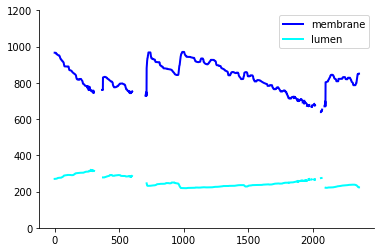

In [27]:
plt.plot(scipy.ndimage.median_filter(df_vesicleIntensities['membraneIntensity_ch0'],30),c='blue',lw=2,label='membrane')
plt.plot(scipy.ndimage.median_filter(df_vesicleIntensities['lumenIntensity_ch0'],30),c='cyan',lw=2,label='lumen')
plt.gca().legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(0,1200)

(0, 1200)

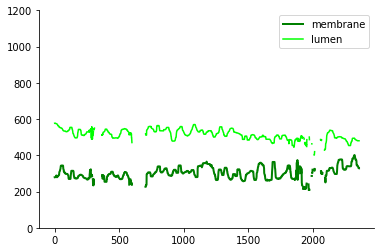

In [23]:
plt.plot(scipy.ndimage.median_filter(df_vesicleIntensities['membraneIntensity_ch1'],30),c='green',lw=2,label='membrane')
plt.plot(scipy.ndimage.median_filter(df_vesicleIntensities['lumenIntensity_ch1'],30),c='lime',label='lumen')
plt.gca().legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(0,1200)

(0, 1200)

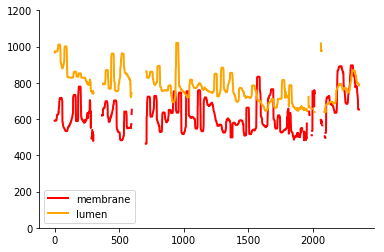

In [21]:
plt.plot(scipy.ndimage.median_filter(df_vesicleIntensities['membraneIntensity_ch2'],30),c='red',lw=2,label='membrane')
plt.plot(scipy.ndimage.median_filter(df_vesicleIntensities['lumenIntensity_ch2'],30),c='orange',lw=2,label='lumen')
plt.gca().legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(0,1200)